# EMOBON data wrangling

This jupyter lab notebook is for checking all the available data that is present in emobon


In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from conneg_functions import execute_to_df, generate_sparql

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
from IPython.core.display import HTML
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# disabel if using labnotebook , for normal notebook enable for interactive plots
#%matplotlib widget

## All col names present for a sample

In [3]:
df = execute_to_df('column_names.sparql')
HTML("""
<style>
    .dataframe td, .dataframe th {
        min-width: 500px;
        word-wrap: break-word;
    }
</style>
""" + df.to_html())

,s
0,https://data.emobon.embrc.eu/ns/sampling#failureComment
1,https://data.emobon.embrc.eu/ns/sampling#sampleDepth
2,https://data.emobon.embrc.eu/ns/sampling#failure
3,https://data.emobon.embrc.eu/ns/sampling#storageLoc
4,https://data.emobon.embrc.eu/ns/sampling#originCountry
5,https://data.emobon.embrc.eu/ns/sampling#enaStudyAccNum
6,https://data.emobon.embrc.eu/ns/sampling#membrCut
7,https://data.emobon.embrc.eu/ns/sampling#longStorage
8,https://data.emobon.embrc.eu/ns/sampling#filtrationTime
9,https://data.emobon.embrc.eu/ns/sampling#lowerFilterSize


## All observations with links to results

In [4]:
observation_results = execute_to_df('all_observation_results.sparql')
observation_results

,observations,property,observationresult,unit,resultnumeric,sample,metadatasample,propertyaltlabel
0,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/P01/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,7.06,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,NO3
1,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/P01/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,7.06,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,NO3
2,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/P01/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,7.06,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,NO3
3,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/P01/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,7.06,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,NO3
4,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/P01/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,7.06,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,NO3
...,...,...,...,...,...,...,...,...
11716,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/A05/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,32.282,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,Sea salinity
11717,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/A05/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,32.282,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,Sea salinity
11718,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/A05/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,31.932,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,Sea salinity
11719,http://data.emobon.embrc.eu/observatory-bpns-c...,http://vocab.nerc.ac.uk/collection/A05/current...,https://rdflib.github.io/.well-known/genid/rdf...,http://vocab.nerc.ac.uk/collection/P06/current...,31.932,http://data.emobon.embrc.eu/observatory-bpns-c...,http://data.emobon.embrc.eu/observatory-bpns-c...,Sea salinity


## percentage of measured properties for all samples

/tmp/ipykernel_333/4021603329.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = new_df.fillna(False).astype(bool)
/tmp/ipykernel_333/4021603329.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(bar.get_x() + bar.get_width() / 2, true_percentages[i] + height / 2, f'{height}%', ha='center', va='bottom', color='black')


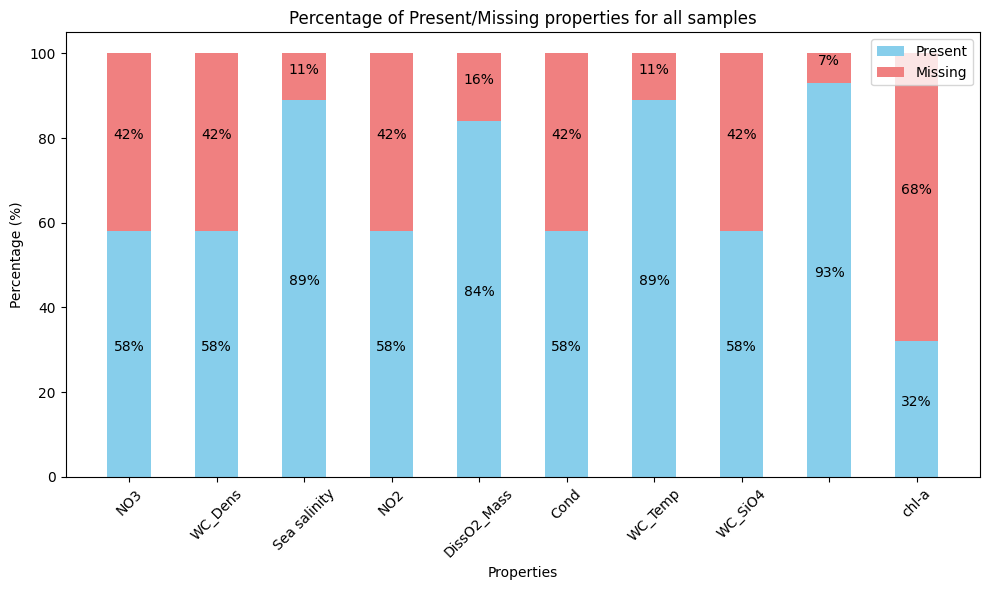

In [5]:


# Get the list of distinct observations and properties
distinct_observations = observation_results['sample'].unique()
distinct_properties = observation_results['propertyaltlabel'].unique()

# Create a new DataFrame with observations as rows and properties as columns
new_df = pd.DataFrame(index=distinct_observations, columns=distinct_properties)

# Populate the DataFrame with True/False values
for observation in distinct_observations:
    for property in distinct_properties:
        new_df.loc[observation, property] = property in observation_results[observation_results['sample'] == observation]['propertyaltlabel'].values

# Convert the DataFrame values to boolean
new_df = new_df.fillna(False).astype(bool)

# Reset the index to make observations a column
# new_df.reset_index(inplace=True)
# new_df.rename(columns={'index': 'sample'}, inplace=True)

# Count the number of True/False values for each property
true_counts = new_df.sum(axis=0)
false_counts = len(new_df) - true_counts

# Calculate the percentage of True/False values for each property
true_percentages = ((true_counts / len(new_df)) * 100).round().astype(int)
false_percentages = ((false_counts / len(new_df)) * 100).round().astype(int)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.5
index = range(len(distinct_properties))

# Extract the last 6 characters of each property for the x-axis labels
property_labels = [prop[:] for prop in distinct_properties]

bars_true = plt.bar(index, true_percentages, bar_width, label='Present', color='skyblue')
bars_false = plt.bar(index, false_percentages, bar_width, bottom=true_percentages, label='Missing', color='lightcoral')

plt.xlabel('Properties')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Present/Missing properties for all samples')
plt.xticks(index, property_labels, rotation=45)
plt.legend()

# Add the percentage amount in each respective bar
for bar in bars_true:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height}%', ha='center', va='bottom', color='black')

for i, bar in enumerate(bars_false):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, true_percentages[i] + height / 2, f'{height}%', ha='center', va='bottom', color='black')
    #plt.text(bar.get_x() + bar.get_width() / 2, true_percentages[i] + height + 1, f'{height:.1f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()



## All unique properties found for all observation results

In [6]:
unique_props = execute_to_df('distinct_properties.sparql')
unique_props

,property
0,http://vocab.nerc.ac.uk/collection/P01/current...
1,http://vocab.nerc.ac.uk/collection/P02/current...
2,http://vocab.nerc.ac.uk/collection/A05/current...
3,http://vocab.nerc.ac.uk/collection/P01/current...
4,http://vocab.nerc.ac.uk/collection/P01/current...
5,https://vocab.lternet.edu/vocab/vocab/index.ph...
6,http://vocab.nerc.ac.uk/collection/P01/current...
7,http://vocab.nerc.ac.uk/collection/P02/current...
8,http://vocab.nerc.ac.uk/collection/S06/current...
9,http://vocab.nerc.ac.uk/collection/P02/current...


In [7]:
observations_by_sample = execute_to_df('count_by_sample.sparql')
observations_by_sample

,sample,observationCount
0,http://data.emobon.embrc.eu/observatory-bpns-c...,12
1,http://data.emobon.embrc.eu/observatory-bpns-c...,12
2,http://data.emobon.embrc.eu/observatory-bpns-c...,6
3,http://data.emobon.embrc.eu/observatory-bpns-c...,11
4,http://data.emobon.embrc.eu/observatory-bpns-c...,4
...,...,...
303,http://data.emobon.embrc.eu/observatory-bpns-c...,6
304,http://data.emobon.embrc.eu/observatory-bpns-c...,4
305,http://data.emobon.embrc.eu/observatory-bpns-c...,1
306,http://data.emobon.embrc.eu/observatory-bpns-c...,5


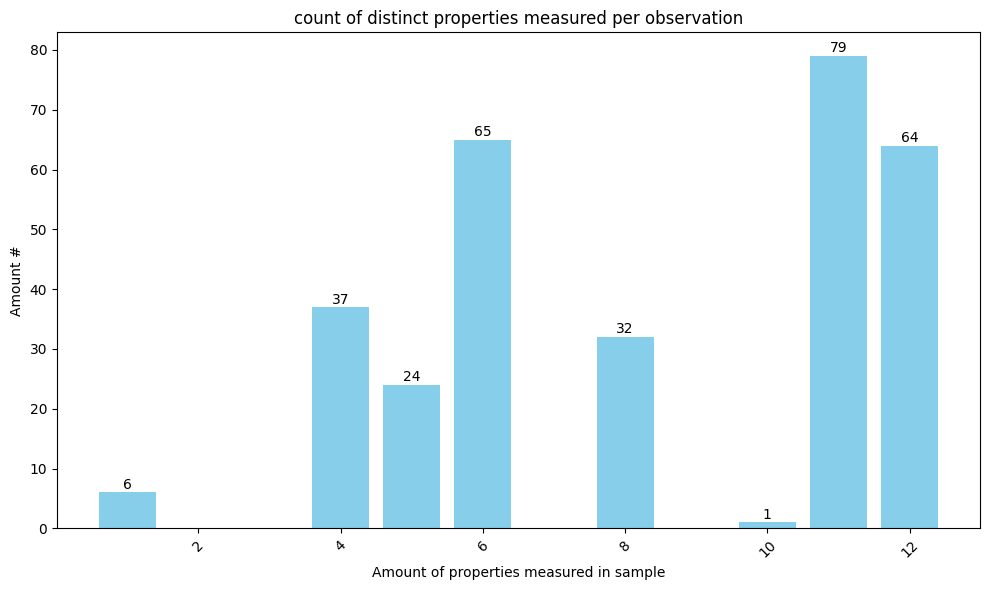

In [8]:
# barplot for the ammount of times a certain ammount of observations has happened

# Group by 'sample' and count the occurrences
observation_counts = observations_by_sample.groupby('observationCount').size().reset_index(name='count')

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(observation_counts['observationCount'], observation_counts['count'], color='skyblue')
plt.title('count of distinct properties measured per observation')
plt.xlabel('Amount of properties measured in sample')
plt.ylabel('Amount #')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [9]:
count_by_property = execute_to_df('count_by_property.sparql')
count_by_property

,property,observationCount
0,http://vocab.nerc.ac.uk/collection/P01/current...,528
1,http://vocab.nerc.ac.uk/collection/P02/current...,528
2,http://vocab.nerc.ac.uk/collection/A05/current...,1341
3,http://vocab.nerc.ac.uk/collection/P01/current...,528
4,http://vocab.nerc.ac.uk/collection/P01/current...,765
5,https://vocab.lternet.edu/vocab/vocab/index.ph...,285
6,http://vocab.nerc.ac.uk/collection/P01/current...,528
7,http://vocab.nerc.ac.uk/collection/P02/current...,1341
8,http://vocab.nerc.ac.uk/collection/P02/current...,528
9,http://vocab.nerc.ac.uk/collection/S06/current...,840


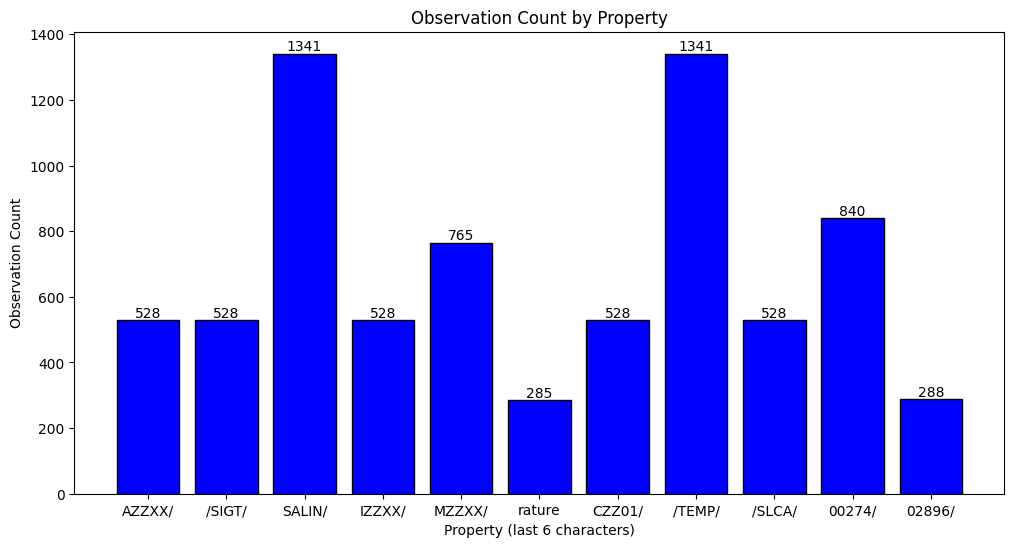

In [10]:
# Extract the last 6 characters of the property column
count_by_property['property_label'] = count_by_property['property'].apply(lambda x: x[-6:])

plt.figure(figsize=(12, 6))
# Create the bar plot
bars = plt.bar(count_by_property['property_label'], count_by_property['observationCount'], color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('Property (last 6 characters)')
plt.ylabel('Observation Count')
plt.title('Observation Count by Property')

# Add the amount of observations above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Show the plot
plt.show()

In [11]:
values_per_property = []
for property_uri in unique_props['property']:
    df = execute_to_df(name='get_values_by_property.sparql',uri=property_uri)
    values_per_property.append(df)

values_per_property

[                                              property resultnumeric  \
 0    http://vocab.nerc.ac.uk/collection/P01/current...          7.06   
 1    http://vocab.nerc.ac.uk/collection/P01/current...          7.06   
 2    http://vocab.nerc.ac.uk/collection/P01/current...         16.44   
 3    http://vocab.nerc.ac.uk/collection/P01/current...         16.44   
 4    http://vocab.nerc.ac.uk/collection/P01/current...          1.75   
 ..                                                 ...           ...   
 347  http://vocab.nerc.ac.uk/collection/P01/current...          4.37   
 348  http://vocab.nerc.ac.uk/collection/P01/current...         21.93   
 349  http://vocab.nerc.ac.uk/collection/P01/current...         21.93   
 350  http://vocab.nerc.ac.uk/collection/P01/current...          15.1   
 351  http://vocab.nerc.ac.uk/collection/P01/current...          15.1   
 
                                                 sample             unitlabel  \
 0    http://data.emobon.embrc.eu/observa

Error processing DataFrame: The 'resultnumeric' column is empty after dropping NaNs.
Error processing DataFrame: The 'resultnumeric' column is empty after dropping NaNs.
Error processing DataFrame: The 'resultnumeric' column is empty after dropping NaNs.
                                            property  bins
0  http://vocab.nerc.ac.uk/collection/P01/current...     5
1  http://vocab.nerc.ac.uk/collection/P02/current...     4
2  http://vocab.nerc.ac.uk/collection/A05/current...    18
3  http://vocab.nerc.ac.uk/collection/P01/current...    19
4  http://vocab.nerc.ac.uk/collection/P01/current...    23
5  http://vocab.nerc.ac.uk/collection/P01/current...    30
6  http://vocab.nerc.ac.uk/collection/P02/current...     8
7  http://vocab.nerc.ac.uk/collection/P02/current...     5
8  http://vocab.nerc.ac.uk/collection/S27/current...     2


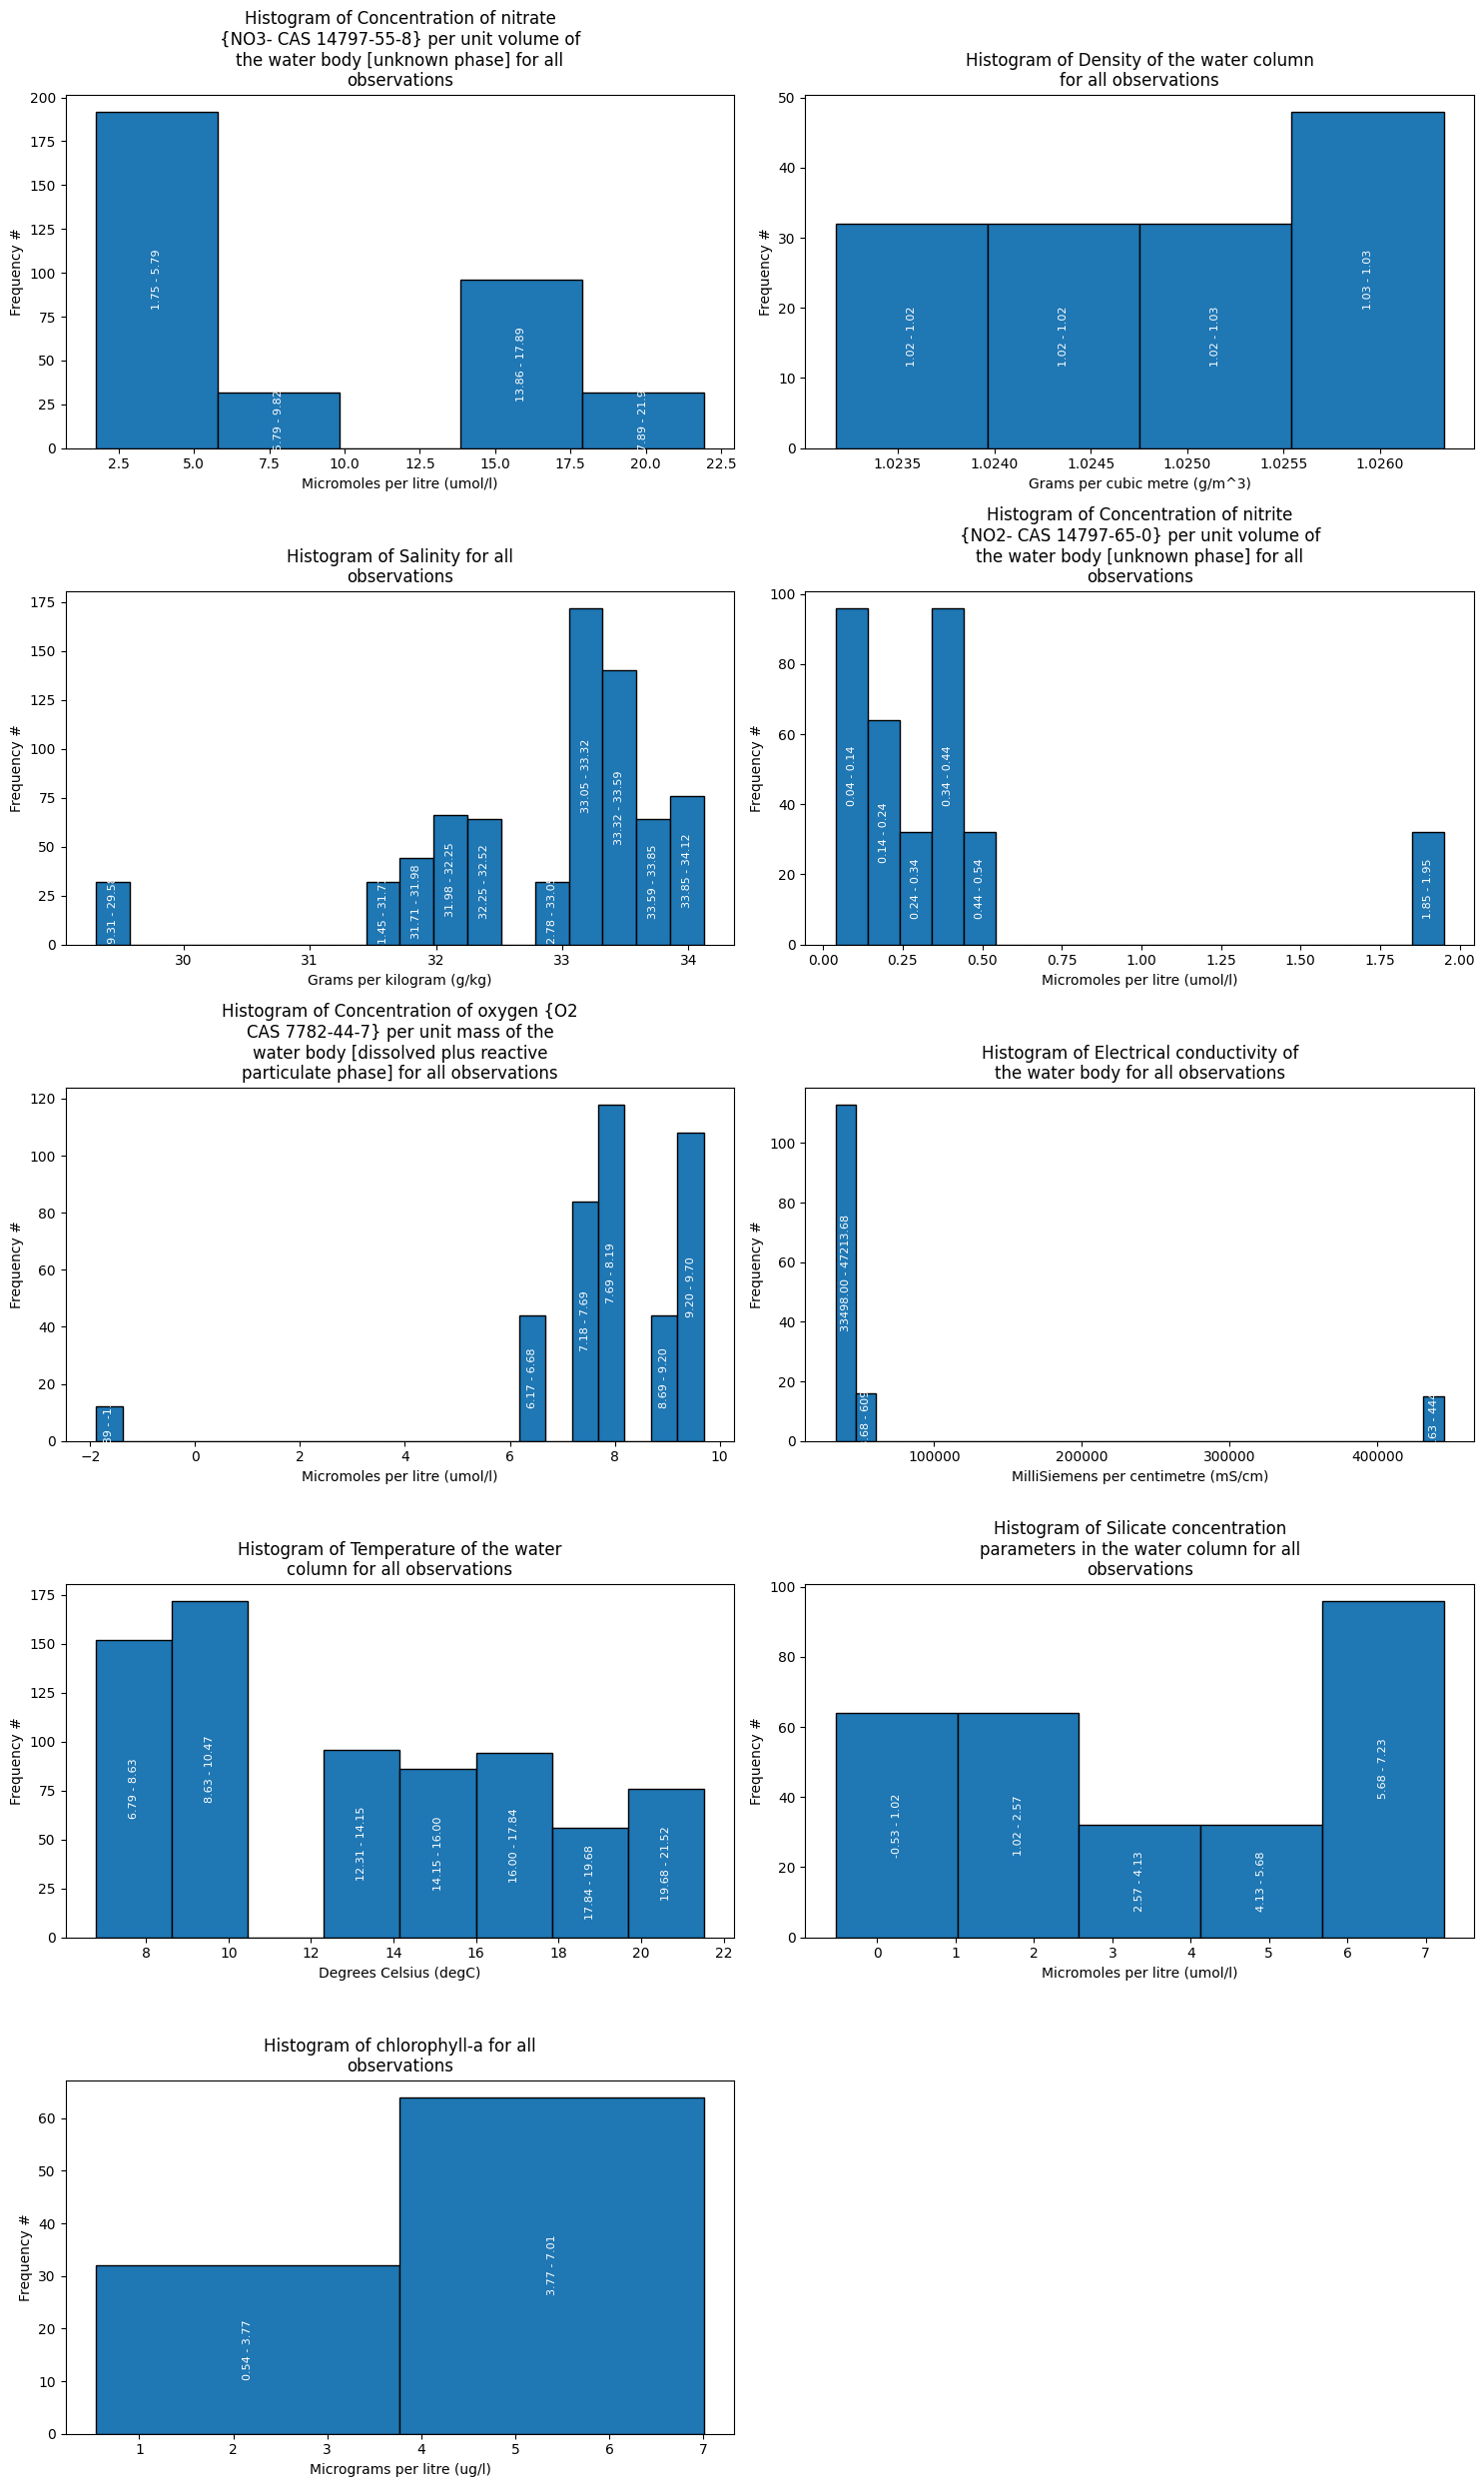

In [12]:
dataframes = values_per_property
# Function to calculate the ideal number of bins using the Freedman-Diaconis rule
# Function to calculate the ideal number of bins using the Freedman-Diaconis rule
def calculate_bins(data):
    q75, q25 = np.percentile(data.dropna(), [75, 25])
    iqr = q75 - q25
    bin_width = 2 * iqr / (len(data.dropna()) ** (1/3))
    bins = int((data.max() - data.min()) / bin_width)
    return bins

# Create a list to store the property and bins information
property_bins_list = []

# Iterate over each DataFrame in the list
for df in dataframes:
    try:
        # Ensure the 'resultnumeric' column data is numeric
        df['resultnumeric'] = pd.to_numeric(df['resultnumeric'], errors='coerce')
        # Check if the length of the 'resultnumeric' column is greater than 0
        if len(df['resultnumeric'].dropna()) > 0:
            # Get the first property value
            property_value = df['property'].iloc[0]
            # Check if the property value starts with 'http://vocab.nerc.ac.uk/'
            if property_value.startswith('http://vocab.nerc.ac.uk/'):
                # Calculate the ideal number of bins for the 'resultnumeric' column
                bins = calculate_bins(df['resultnumeric'])
                if bins > 30: 
                    bins = 30
                # Append the property and bins information to the list
                property_bins_list.append({'property': property_value, 'bins': bins})
            else:
                raise ValueError("The 'property' value does not start with 'http://vocab.nerc.ac.uk/'.")
        else:
            raise ValueError("The 'resultnumeric' column is empty after dropping NaNs.")
    except Exception as e:
        print(f"Error processing DataFrame: {e}")

# Create a new DataFrame from the list
property_bins_df = pd.DataFrame(property_bins_list)

# Print the new DataFrame
print(property_bins_df)

# Calculate the number of rows and columns for the subplots
num_plots = len(property_bins_df)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Iterate over the property_bins_df DataFrame and plot each histogram in a subplot
for index, row in property_bins_df.iterrows():
    for df in dataframes:
        if not df.empty and df['property'].iloc[0] == row['property']:
            ax = axes[index]
            counts, bin_edges = np.histogram(df['resultnumeric'].dropna(), bins=row['bins'])
            ax.hist(df['resultnumeric'].dropna(), bins=row['bins'], edgecolor='black')
            
            # Wrap the title text
            title_text = f"Histogram of {df['propertylabel'].iloc[0]} for all observations"
            wrapped_title = "\n".join(textwrap.wrap(title_text, width=40))
            ax.set_title(wrapped_title)
            
            ax.set_xlabel(f"{df['unitlabel'].iloc[0]} ({df['unitaltlabel'].iloc[0]})")
            ax.set_ylabel('Frequency #')

            # Calculate and add the range per bin as labels
            for count, edge in zip(counts, bin_edges[:-1]):
                if count > 0:  # Only add label if the frequency is greater than 0
                    bin_range = f"{edge:.2f} - {edge + (bin_edges[1] - bin_edges[0]):.2f}"
                    ax.text(edge + (bin_edges[1] - bin_edges[0]) / 2, count / 2, bin_range, ha='center', va='center', rotation=90, color='white', fontsize=8)

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [13]:
# same histograzms but interactive

# Function to update the plot based on the selected property
def update_plot(selected_property):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for df in dataframes:
        if not df.empty and df['property'].iloc[0] == selected_property:
            row = property_bins_df[property_bins_df['property'] == selected_property].iloc[0]
            counts, bin_edges = np.histogram(df['resultnumeric'].dropna(), bins=row['bins'])
            ax.hist(df['resultnumeric'].dropna(), bins=row['bins'], edgecolor='black')
            
            # Wrap the title text
            title_text = f"Histogram of {df['propertylabel'].iloc[0]} for all observations"
            wrapped_title = "\n".join(textwrap.wrap(title_text, width=40))
            ax.set_title(wrapped_title)
            
            ax.set_xlabel(f"{df['unitlabel'].iloc[0]} ({df['unitaltlabel'].iloc[0]})")
            ax.set_ylabel('Frequency #')

            # Calculate and add the range per bin as labels
            for count, edge in zip(counts, bin_edges[:-1]):
                if count > 0:  # Only add label if the frequency is greater than 0
                    bin_range = f"{edge:.2f} - {edge + (bin_edges[1] - bin_edges[0]):.2f}"
                    ax.text(edge + (bin_edges[1] - bin_edges[0]) / 2, count / 2, bin_range, ha='center', va='center', rotation=90, color='white', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting the property
property_dropdown = widgets.Dropdown(
    options=property_bins_df['property'].tolist(),
    description='Property:',
    disabled=False,
)

# Use the interact function to update the plot based on the selected property
interact(update_plot, selected_property=property_dropdown)

interactive(children=(Dropdown(description='Property:', options=('http://vocab.nerc.ac.uk/collection/P01/curre…

<function __main__.update_plot(selected_property)>

In [14]:
# check on the samples themselves

# get the types of samples

types_samples = execute_to_df(name='types_samples.sparql')
# Display DataFrame with CSS styling
HTML("""
<style>
    .dataframe td, .dataframe th {
        min-width: 200px;
        word-wrap: break-word;
    }
</style>
""" + types_samples.to_html())

,issampleof,sampleCount
0,seawater [ENVO:00002149],208
1,metagenome,273
2,https://www.ncbi.nlm.nih.gov/taxonomy/browser/wwwtax.cgi?id=1874687,208
3,coastal sea water [ENVO:00002150],208
4,surface water [ENVO:00002042],48
5,https://www.ncbi.nlm.nih.gov/taxonomy/browser/wwwtax.cgi?id=33208,28
6,sediment [ENVO:00002007],100
7,mimarks-specimen,35
8,meio,25
9,https://www.ncbi.nlm.nih.gov/taxonomy/browser/wwwtax.cgi?id=412755,44


## remarks

The links to ncbi shown above lead to nowhere , what is the deal with this?

In [15]:
extended_obs = execute_to_df("extended_observations_with_metadata.sparql")
extended_obs

df = extended_obs

# Identify columns with fewer than 20 unique values
columns_to_filter = [col for col in df.columns if df[col].nunique() < 20]

# Create a dictionary to store the widgets for each column
filter_widgets = {}

# Create an output widget to display the filtered DataFrame
output = widgets.Output()

# Create a function to update the filtered DataFrame
def update_filtered_df(*args):
    filtered_df = df.copy()
    for col, widget in filter_widgets.items():
        if widget.value != 'All':
            filtered_df = filtered_df[filtered_df[col] == widget.value]
    with output:
        clear_output(wait=True)
        display(filtered_df)

# Create widgets for each column and add them to the filter_widgets dictionary
for col in columns_to_filter:
    unique_values = ['All'] + df[col].unique().tolist()
    widget = widgets.Dropdown(
        options=unique_values,
        description=col,
        value='All'
    )
    widget.observe(update_filtered_df, names='value')
    filter_widgets[col] = widget

# Display the widgets
for widget in filter_widgets.values():
    display(widget)

# Display the initial DataFrame
display(output)
update_filtered_df()  # Initial call to display the full DataFrame

Dropdown(description='property', options=('All', 'http://vocab.nerc.ac.uk/collection/P02/current/SIGT/', 'http…

Dropdown(description='unit', options=('All', 'http://vocab.nerc.ac.uk/collection/P06/current/UGMC/', 'http://v…

Dropdown(description='unitlabel', options=('All', 'Grams per cubic metre', 'Micrograms per litre', 'Micromoles…

Dropdown(description='unitaltlabel', options=('All', 'g/m^3', 'ug/l', 'umol/l', 'degC', 'mS/cm', 'g/kg'), valu…

Dropdown(description='propertyaltlabel', options=('All', 'WC_Dens', 'chl-a', 'NO2', 'DissO2_Mass', 'WC_Temp', …

Dropdown(description='filtrationtime', options=('All', '0.25', '0.5', '0.083333', '0.2', '0.05', '0.4', '0.833…

Dropdown(description='samplesize', options=('All', '0.25', '6', '7', '10', '8', '0.2', '2', '9'), value='All')

Dropdown(description='sampletype', options=('All', '', 'seawater [ENVO:00002149]', 'metagenome', 'https://www.…

Dropdown(description='sampledepth', options=('All', '20', '19.9', '18.66', '20.54', '21.2', 'Expected 2024-12-…

Output()

In [16]:
# interactive boxplots
# Create a dictionary to store the widgets for each column
# Ensure the 'resultnumeric' column data is numeric and handle errors
try:
    df['resultnumeric'] = pd.to_numeric(df['resultnumeric'], errors='coerce')
except Exception as e:
    print(e)
    pass

# Drop rows with NaN values in 'resultnumeric'
df = df.dropna(subset=['resultnumeric'])

# Identify columns with fewer than 20 unique values (excluding 'resultnumeric', 'property', 'unit', and 'propertyaltlabel')
columns_to_filter = [col for col in df.columns if df[col].nunique() < 20 and col not in ['resultnumeric', 'property', 'unit', 'propertyaltlabel','unitlabel','unitaltlabel']]

# Create a dictionary to store the widgets for each column
filter_widgets = {}

# Create an output widget to display the boxplot
output = widgets.Output()

# Create a function to update the boxplot based on the selected category and propertyaltlabel
def update_boxplot(selected_category, selected_propertyaltlabel):
    with output:
        clear_output(wait=True)
        filtered_df = df.copy()
        if selected_propertyaltlabel != 'All':
            filtered_df = filtered_df[filtered_df['propertyaltlabel'] == selected_propertyaltlabel]
        
        # Extract unitlabel and unitaltlabel from the first row of the filtered DataFrame
        if not filtered_df.empty:
            unitlabel = filtered_df.iloc[0]['unitlabel']
            unitaltlabel = filtered_df.iloc[0]['unitaltlabel']
            ylabel = f'{unitlabel} ({unitaltlabel})'
        else:
            ylabel = 'resultnumeric'
        
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Customize the boxplot appearance
        boxprops = dict(linestyle='-', linewidth=2, color='blue')
        whiskerprops = dict(linestyle='--', linewidth=2, color='green')
        capprops = dict(linestyle='-', linewidth=2, color='red')
        medianprops = dict(linestyle='-', linewidth=2, color='orange')
        meanprops = dict(marker='o', markerfacecolor='black', markeredgecolor='black', markersize=10)
        
        filtered_df.boxplot(column='resultnumeric', by=selected_category, ax=ax,
                            boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops,
                            medianprops=medianprops, meanprops=meanprops, showmeans=True)
        
        # Rotate x-axis labels 45 degrees and truncate them to 30 characters
        ax.set_xticklabels([label.get_text()[:30] for label in ax.get_xticklabels()], rotation=45, ha='right')
        
        plt.title(f'Boxplot of resultnumeric by {selected_category} (propertyaltlabel: {selected_propertyaltlabel})')
        plt.suptitle('')
        plt.xlabel(selected_category)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.show()

# Create widgets for each column and add them to the filter_widgets dictionary
for col in columns_to_filter:
    unique_values = ['All'] + df[col].unique().tolist()
    widget = widgets.Dropdown(
        options=unique_values,
        description=col,
        value='All'
    )
    filter_widgets[col] = widget

# Create a dropdown widget for selecting the category
category_dropdown = widgets.Dropdown(
    options=columns_to_filter,
    description='Category:',
    disabled=False
)

# Create a dropdown widget for selecting the propertyaltlabel
propertyaltlabel_dropdown = widgets.Dropdown(
    options=['All'] + df['propertyaltlabel'].unique().tolist(),
    description='PropertyAltLabel:',
    disabled=False
)

# Function to update the plot when any dropdown value changes
def on_change(change):
    update_boxplot(category_dropdown.value, propertyaltlabel_dropdown.value)

# Attach the on_change function to the dropdowns
category_dropdown.observe(on_change, names='value')
propertyaltlabel_dropdown.observe(on_change, names='value')

# Display the widgets
display(category_dropdown)
display(propertyaltlabel_dropdown)
display(output)

# Initial call to display the boxplot
update_boxplot(category_dropdown.value, propertyaltlabel_dropdown.value)


Dropdown(description='Category:', options=('filtrationtime', 'samplesize', 'sampletype', 'sampledepth'), value…

Dropdown(description='PropertyAltLabel:', options=('All', 'NO2', 'NO3', 'WC_SiO4', 'WC_Dens', 'DissO2_Mass', '…

Output()